In [1]:
import pandas as pd

votadf = pd.read_csv("votacoes_BA_2016.csv",index_col=False)

votadf.shape


(58762, 30)

Quais são os tipos de dados de cada um dos atributos ?


In [2]:
votadf.dtypes

Unnamed: 0                  int64
ano_eleicao                 int64
cod_sit_cand_superior       int64
codigo_cargo                int64
codigo_municipio            int64
codigo_sit_cand_tot       float64
codigo_sit_candidato        int64
composicao_legenda         object
datahora_geracao           object
desc_sit_cand_superior     object
desc_sit_cand_tot          object
desc_sit_candidato         object
descricao_cargo            object
descricao_eleicao          object
nome_candidato             object
nome_coligacao             object
nome_municipio             object
nome_partido               object
nome_urna_candidato        object
num_turno                   int64
numero_cand                 int64
numero_partido              int64
numero_zona                 int64
sequencial_legenda          int64
sigla_partido              object
sigla_ue                    int64
sigla_uf                   object
sq_candidato                int64
total_votos                 int64
transito      

Quais cidades tem votações registradas?


In [4]:
votadf.nome_municipio.unique()

array(['ABAÍRA', 'ABARÉ', 'ACAJUTIBA', 'ADUSTINA', 'ÁGUA FRIA', 'AIQUARA',
       'ALAGOINHAS', 'ALCOBAÇA', 'ALMADINA', 'AMARGOSA',
       'AMÉLIA RODRIGUES', 'AMÉRICA DOURADA', 'ANAGÉ', 'ANDARAÍ',
       'ANDORINHA', 'ANGICAL', 'ANGUERA', 'ANTAS', 'ANTÔNIO CARDOSO',
       'ANTÔNIO GONÇALVES', 'APORÁ', 'APUAREMA', 'ARAÇÁS', 'ARACATU',
       'ARACI', 'ARAMARI', 'ARATACA', 'ARATUÍPE', 'AURELINO LEAL',
       'BAIANÓPOLIS', 'BAIXA GRANDE', 'BANZAÊ', 'BARRA',
       'BARRA DA ESTIVA', 'BARRA DO CHOÇA', 'BARRA DO MENDES',
       'BARRA DO ROCHA', 'BARREIRAS', 'BARRO ALTO', 'BARROCAS',
       'BARRO PRETO', 'BELMONTE', 'BELO CAMPO', 'BIRITINGA', 'BOA NOVA',
       'BOA VISTA DO TUPIM', 'BOM JESUS DA LAPA', 'BOM JESUS DA SERRA',
       'BONINAL', 'BONITO', 'BOQUIRA', 'BOTUPORÃ', 'BREJÕES',
       'BREJOLÂNDIA', 'BROTAS DE MACAÚBAS', 'BRUMADO', 'BUERAREMA',
       'BURITIRAMA', 'CAATIBA', 'CABACEIRAS DO PARAGUAÇU', 'CACHOEIRA',
       'CACULÉ', 'CAEM', 'CAETANOS', 'CAETITÉ', 'CAFARNAUM', 'CA

In [ ]:
votadf.nome_municipio.value_counts()

SALVADOR                20220
FEIRA DE SANTANA         1624
VITÓRIA DA CONQUISTA     1122
CAMAÇARI                  818
ITABUNA                   762
                        ...  
PRESIDENTE DUTRA           26
ABAÍRA                     26
NOVO TRIUNFO               25
CORIBE                     25
PINTADAS                   24
Name: nome_municipio, Length: 417, dtype: int64

Verifique os campos de situação do candidato, qual os valores existentes?


In [ ]:
print(votadf.desc_sit_cand_superior.value_counts())
print(votadf.desc_sit_cand_tot.value_counts())
print(votadf.desc_sit_candidato.value_counts())

APTO      56829
INAPTO     1933
Name: desc_sit_cand_superior, dtype: int64
SUPLENTE            40138
NÃO ELEITO          11130
ELEITO POR QP        4573
ELEITO POR MÉDIA     1089
ELEITO                449
2º TURNO                6
Name: desc_sit_cand_tot, dtype: int64
DEFERIDO                             56126
INDEFERIDO                            1749
INDEFERIDO COM RECURSO                 475
DEFERIDO COM RECURSO                   208
RENÚNCIA                               178
SUBSTITUTO PENDENTE DE JULGAMENTO       20
CANCELADO                                4
NÃO CONHECIMENTO DO PEDIDO               2
Name: desc_sit_candidato, dtype: int64


A votação está registrada por zona eleitoral, faça a agregação de dados e obtenha uma nova tabela com a votação de todos os candidatos por município.


In [ ]:
votadftot = votadf[ ["sq_candidato",'nome_candidato','nome_municipio',"num_turno","total_votos",\
                    'desc_sit_cand_tot','descricao_cargo'] ]\
                    .groupby(["sq_candidato",'nome_municipio',"num_turno",\
                              'nome_candidato','desc_sit_cand_tot','descricao_cargo']).sum()\
                              .reset_index().sort_values(by=['total_votos'], ascending=False)

display(votadftot)


,sq_candidato,nome_municipio,num_turno,nome_candidato,desc_sit_cand_tot,descricao_cargo,total_votos
10523,50000013459,SALVADOR,1,ANTONIO CARLOS PEIXOTO DE MAGALHÃES NETO,ELEITO,PREFEITO,982246
1207,50000002795,FEIRA DE SANTANA,1,JOSÉ RONALDO DE CARVALHO,ELEITO,PREFEITO,212408
11448,50000014599,SALVADOR,1,ALICE MAZZUCO PORTUGAL,NÃO ELEITO,PREFEITO,193102
30443,50000036221,SALVADOR,1,MANOEL ISIDORIO DE SANTANA JUNIOR,NÃO ELEITO,PREFEITO,114291
1839,50000003484,VITÓRIA DA CONQUISTA,2,HERZEM GUSMÃO PEREIRA,ELEITO,PREFEITO,95710
...,...,...,...,...,...,...,...
26044,50000031123,MARACÁS,1,GILBERTO FERREIRA DA SILVA,NÃO ELEITO,VEREADOR,0
26042,50000031120,IPIRÁ,1,RAILANE OLIVEIRA MARINHO,SUPLENTE,VEREADOR,0
16579,50000020252,IAÇU,1,MARIA WILZA OLIVEIRA MOREIRA,SUPLENTE,VEREADOR,0
16578,50000020251,IAÇU,1,KARINA SOUZA DE ALMEIDA,SUPLENTE,VEREADOR,0


Escolha uma cidade, quais candidatos a prefeito desta cidade? Como foi a votação no primeiro e no segundo turno? Quem foi eleito?


In [ ]:
print(votadf[(votadf['nome_municipio'] == 'BARROCAS') & (votadf['codigo_cargo'] == 11)]['nome_urna_candidato'])


print('Total de votos no primeiro turno: ', votadf[(votadf['nome_municipio'] == 'BARROCAS') & (votadf['codigo_cargo'] == 11) & (votadf['num_turno'] == 1)]['total_votos'].sum())


print('Total de votos no segundo turno: ', votadf[(votadf['nome_municipio'] == 'BARROCAS') & (votadf['codigo_cargo'] == 11) & (votadf['num_turno'] == 2)]['total_votos'].sum())


print('Candidato Eleito: ',votadf[(votadf['nome_municipio'] == 'BARROCAS') & (votadf['codigo_cargo'] == 11) & (votadf['desc_sit_cand_tot'] == 'ELEITO')]['nome_urna_candidato'])


3604    JAI DE BARROCAS
3605      TITA DE ROQUE
3606         DR NARCISO
Name: nome_urna_candidato, dtype: object
Total de votos no primeiro turno:  11090
Total de votos no segundo turno:  0
Candidato Eleito:  3604    JAI DE BARROCAS
Name: nome_urna_candidato, dtype: object


Qual foi a zona eleitoral com maior/menor número de votos registrados?


In [ ]:
votadfzona = votadf[["numero_zona","num_turno",'descricao_cargo',"total_votos"]].groupby(["numero_zona","num_turno",'descricao_cargo']).sum().reset_index().sort_values(by=['total_votos'], ascending=False)


#display(votadfzona)

display(votadfzona[votadfzona['total_votos']==votadfzona['total_votos'].max()])

# https://pandas.pydata.org/docs/reference/api/pandas.Series.argmax.html
# https://discovery.cs.illinois.edu/guides/DataFrame-Fundamentals/dataframe-loc-vs-iloc/
zonamax = votadfzona.iloc[votadfzona['total_votos'].argmax()]['numero_zona']

display(votadf[ votadf['numero_zona'] == zonamax ]["nome_municipio"].unique())


display(votadfzona[votadfzona['total_votos']==votadfzona['total_votos'].min()])

zonamin = votadfzona.iloc[votadfzona['total_votos'].argmin()]['numero_zona']

display(votadf[ votadf['numero_zona'] == zonamin ]["nome_municipio"].unique())


,numero_zona,num_turno,descricao_cargo,total_votos
309,154,1,PREFEITO,79666


array(['FEIRA DE SANTANA'], dtype=object)

,numero_zona,num_turno,descricao_cargo,total_votos
67,34,1,VEREADOR,11405


array(['BELMONTE'], dtype=object)

Quantos candidatos a prefeitos e a vereadores houveram no total em 2016 na Bahia?

In [ ]:
display( votadf[["num_turno",'descricao_cargo',"sq_candidato"]].groupby(["num_turno",'descricao_cargo'])["sq_candidato"].nunique() )



num_turno  descricao_cargo
1          PREFEITO            1209
           VEREADOR           32996
2          PREFEITO               2
Name: sq_candidato, dtype: int64

Qual foi a cidade com maior e menor número de candidatos a prefeito?

In [ ]:
series_candidados_por_cidade = votadf.get(["descricao_cargo",'sq_candidato',"nome_municipio"])[(votadf["descricao_cargo"] == "PREFEITO")].drop_duplicates(subset=["sq_candidato"]).groupby(by=['nome_municipio']).count()["sq_candidato"]
min_,max_ = series_candidados_por_cidade.min(),series_candidados_por_cidade.max()
print('menor quantidade de prefeitos: ',min_,' Maior quantidade de prefeitos',max_)
series_candidados_por_cidade

menor quantidade de prefeitos:  2  Maior quantidade de prefeitos 10


nome_municipio
ABARÉ                  2
ABAÍRA                 2
ACAJUTIBA              4
ADUSTINA               3
AIQUARA                3
                      ..
WANDERLEY              2
WENCESLAU GUIMARÃES    3
XIQUE-XIQUE            2
ÁGUA FRIA              3
ÉRICO CARDOSO          2
Name: sq_candidato, Length: 417, dtype: int64

In [ ]:
print(f'cidade com maior quantidade de candidatos',list(series_candidados_por_cidade[series_candidados_por_cidade == max_].index))
print(f'cidade com menor quantidade de candidatos',list(series_candidados_por_cidade[series_candidados_por_cidade == min_].index))

cidade com maior quantidade de candidatos ['ILHÉUS']
cidade com menor quantidade de candidatos ['ABARÉ', 'ABAÍRA', 'ALMADINA', 'AMARGOSA', 'ANGUERA', 'ANTAS', 'ANTÔNIO GONÇALVES', 'APORÁ', 'APUAREMA', 'ARACATU', 'ARAMARI', 'ARATUÍPE', 'BAIANÓPOLIS', 'BANZAÊ', 'BARRA DA ESTIVA', 'BARRA DO MENDES', 'BARRA DO ROCHA', 'BARRO ALTO', 'BIRITINGA', 'BOA VISTA DO TUPIM', 'BOM JESUS DA SERRA', 'BONITO', 'BOQUIRA', 'BOTUPORÃ', 'BROTAS DE MACAÚBAS', 'BURITIRAMA', 'CABACEIRAS DO PARAGUAÇU', 'CACULÉ', 'CAEM', 'CAETANOS', 'CAFARNAUM', 'CAIRU', 'CALDEIRÃO GRANDE', 'CAMPO FORMOSO', 'CANDEAL', 'CANDEIAS', 'CANÁPOLIS', 'CATOLÂNDIA', 'CATURAMA', 'CHORROCHÓ', 'COCOS', 'CONCEIÇÃO DO ALMEIDA', 'CONCEIÇÃO DO COITÉ', 'CONDE', 'CONDEÚBA', 'CONTENDAS DO SINCORÁ', 'CORDEIROS', 'CORIBE', 'CORONEL JOÃO SÁ', 'CORRENTINA', 'COTEGIPE', 'CRAVOLÂNDIA', 'CRISTÓPOLIS', 'CÍCERO DANTAS', 'DOM BASÍLIO', 'DOM MACEDO COSTA', 'DÁRIO MEIRA', 'ELÍSIO MEDRADO', 'EUCLIDES DA CUNHA', 'FEIRA DA MATA', 'FIRMINO ALVES', 'FORMOSA DO RIO

In [ ]:
aux = votadf[['descricao_cargo','nome_municipio','sq_candidato']][votadf['descricao_cargo'] == 'PREFEITO'].drop_duplicates('sq_candidato').groupby(by=['nome_municipio']).count()
aux[aux['descricao_cargo'] == (aux['descricao_cargo'].max())]

,descricao_cargo,sq_candidato
nome_municipio,,
ILHÉUS,10,10


In [ ]:
aux = votadf[['descricao_cargo','nome_municipio','sq_candidato']][votadf['descricao_cargo'] == 'PREFEITO'].drop_duplicates('sq_candidato').groupby(by=['nome_municipio']).count()
aux[aux['descricao_cargo'] == (aux['descricao_cargo'].min())]

,descricao_cargo,sq_candidato
nome_municipio,,
ABARÉ,2,2
ABAÍRA,2,2
ALMADINA,2,2
AMARGOSA,2,2
ANGUERA,2,2
...,...,...
VÁRZEA NOVA,2,2
WAGNER,2,2
WANDERLEY,2,2


Qual foi a cidade com maior e menor número de candidatos a vereador?

In [ ]:
aux = votadf[['descricao_cargo','nome_municipio','sq_candidato']][votadf['descricao_cargo'] == 'VEREADOR'].drop_duplicates('sq_candidato').groupby(by=['nome_municipio']).count()
aux[aux['descricao_cargo'] == (aux['descricao_cargo'].max())]

,descricao_cargo,sq_candidato
nome_municipio,,
SALVADOR,1004,1004


Qual foi a média de votos dos candidatos a prefeito eleitos?



In [ ]:
novo_votadf = votadf[["sq_candidato", "nome_urna_candidato", "descricao_cargo", "total_votos", "desc_sit_cand_tot"]]

novo_votadf_filterd = novo_votadf[(novo_votadf["descricao_cargo"] == "PREFEITO") & (novo_votadf["desc_sit_cand_tot"] == "ELEITO")]
novo_votadf_filterd = novo_votadf_filterd.groupby("sq_candidato").sum()

novo_votadf_filterd["total_votos"].describe()

<ipython-input-41-b21668781c93>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  novo_votadf_filterd = novo_votadf_filterd.groupby("sq_candidato").sum()


count       413.000000
mean      10648.811138
std       49679.416028
min        1213.000000
25%        3823.000000
50%        5495.000000
75%        8381.000000
max      982246.000000
Name: total_votos, dtype: float64

Qual é o desvio padrão de votos dos candidatos a prefeito eleitos?


Qual o mínimo e o máximo de votos dos candidatos a prefeito eleitos?


Faça um histograma do total de votos dos candidatos a prefeito eleitos.

array([[<Axes: title={'center': 'total_votos'}>]], dtype=object)

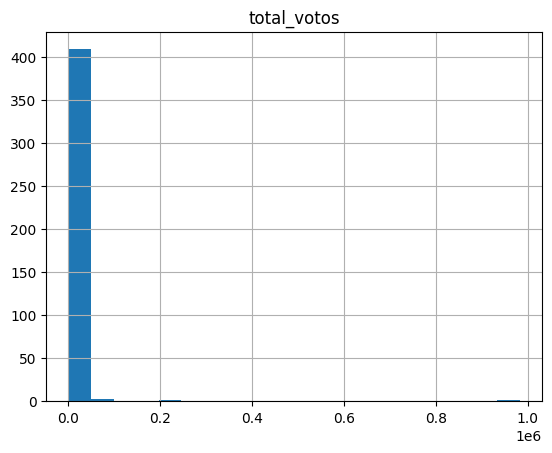

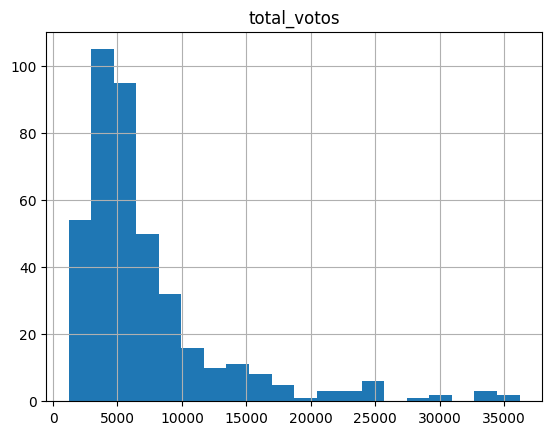

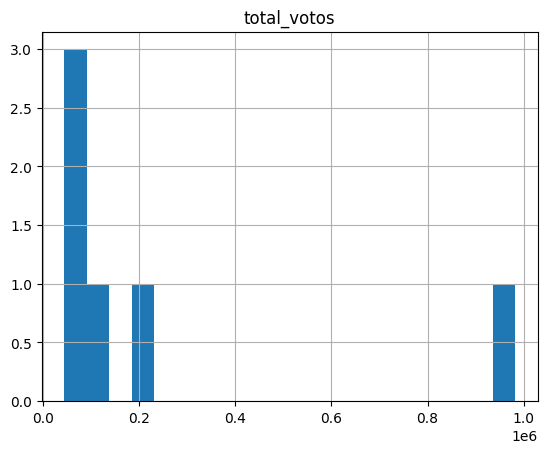

In [ ]:

votadftot[ (votadftot.desc_sit_cand_tot=="ELEITO") & (votadftot.descricao_cargo=="PREFEITO") ].hist(column="total_votos", bins=20)

votadftot[ (votadftot.desc_sit_cand_tot=="ELEITO") & (votadftot.descricao_cargo=="PREFEITO") & \
          (votadftot.total_votos<40000) ].hist(column="total_votos", bins=20)

votadftot[ (votadftot.desc_sit_cand_tot=="ELEITO") & (votadftot.descricao_cargo=="PREFEITO") & \
          (votadftot.total_votos>=40000) ].hist(column="total_votos", bins=20)

Faça a junção da tabela de votação com a tabela de candidatos. (veja atributos 'sq_candidato', 'sequencial_candidato’)


In [ ]:
canddf = pd.read_csv("candidatos_BA_2016.csv",index_col=False)

print(canddf.sequencial_candidato.value_counts())
print(canddf[ canddf.sequencial_candidato == 50000003484 ])

#canddf.drop_duplicates('sequencial_candidato')
canddf = canddf[canddf.num_turno == 1]

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge
mergdf = votadf.merge(canddf, left_on='sq_candidato', right_on= 'sequencial_candidato', validate='many_to_one')
mergdf


50000003484    2
50000003485    2
50000012157    2
50000012158    2
50000008123    1
              ..
50000030511    1
50000030512    1
50000030513    1
50000038771    1
50000003195    1
Name: sequencial_candidato, Length: 36810, dtype: int64
       Unnamed: 0  ano_eleicao  cod_grau_instrucao  cod_sit_tot_turno  \
34725       34725         2016                   8                  1   
34726       34726         2016                   8                  6   

       cod_situacao_candidatura  codigo_cargo  codigo_cor_raca  \
34725                         2            11                3   
34726                         2            11                3   

       codigo_estado_civil  codigo_legenda  codigo_municipio_nascimento  ...  \
34725                    3     50000000263                           -3  ...   
34726                    3     50000000263                           -3  ...   

       num_titulo_eleitoral_candidato  num_turno  numero_candidato  \
34725                     4

,Unnamed: 0_x,ano_eleicao_x,cod_sit_cand_superior,codigo_cargo_x,codigo_municipio,codigo_sit_cand_tot,codigo_sit_candidato,composicao_legenda_x,datahora_geracao_x,desc_sit_cand_superior,...,num_titulo_eleitoral_candidato,num_turno_y,numero_candidato,numero_partido_y,sequencial_candidato,sigla_legenda,sigla_partido_y,sigla_ue_y,sigla_uf_y,sigla_uf_nascimento
0,0,2016,12,11,33014,1.0,2,PTB / PMDB / DEM / PTN / PRB,2018-04-24T17:50:08-03:00,APTO,...,7022950566,1,14,14,50000027226,NaN,PTB,33014,BA,BA
1,1,2016,12,11,33014,4.0,2,PP / PSB / PSD / PDT,2018-04-24T17:50:08-03:00,APTO,...,7024650574,1,11,11,50000005759,NaN,PP,33014,BA,BA
2,2,2016,12,13,33014,2.0,2,PP / PSB / PSD / PDT,2018-04-24T17:50:08-03:00,APTO,...,8533260515,1,11111,11,50000005750,NaN,PP,33014,BA,BA
3,3,2016,12,13,33014,2.0,2,PTB / PMDB / DEM / PTN / PRB,2018-04-24T17:50:08-03:00,APTO,...,92119300515,1,15555,15,50000027223,NaN,PMDB,33014,BA,BA
4,4,2016,12,13,33014,2.0,2,PP / PSB / PSD / PDT,2018-04-24T17:50:08-03:00,APTO,...,101315080523,1,12345,12,50000005753,NaN,PDT,33014,BA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58757,58757,2016,12,13,39713,5.0,2,PP / PSD / PSDB / PSB / PDT / PT / PC do B,2018-04-24T17:50:08-03:00,APTO,...,118726700566,1,40555,40,50000030630,NaN,PSB,39713,BA,BA
58758,58758,2016,12,13,39713,5.0,2,PP / PSD / PSDB / PSB / PDT / PT / PC do B,2018-04-24T17:50:08-03:00,APTO,...,90980970523,1,40777,40,50000030639,NaN,PSB,39713,BA,BA
58759,58759,2016,12,13,39713,5.0,2,PMDB / PR / SD / PTB / DEM / PSC / PV / PROS /...,2018-04-24T17:50:08-03:00,APTO,...,83575500523,1,17610,17,50000002342,NaN,PSL,39713,BA,BA
58760,58760,2016,12,13,39713,5.0,2,PP / PSD / PSDB / PSB / PDT / PT / PC do B,2018-04-24T17:50:08-03:00,APTO,...,90970470507,1,40999,40,50000030629,NaN,PSB,39713,BA,BA


Considerando os candidatos a prefeito (ou a vereador) de todos municípios, faça dois histogramas com os totais de votos recebidos pelo candidato, um histograma para sexo feminino e outro para sexo masculino.


In [ ]:
mergdf.descricao_sexo.unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

In [ ]:
mergdf.columns

Index(['Unnamed: 0_x', 'ano_eleicao_x', 'cod_sit_cand_superior',
       'codigo_cargo_x', 'codigo_municipio', 'codigo_sit_cand_tot',
       'codigo_sit_candidato', 'composicao_legenda_x', 'datahora_geracao_x',
       'desc_sit_cand_superior', 'desc_sit_cand_tot', 'desc_sit_candidato',
       'descricao_cargo_x', 'descricao_eleicao_x', 'nome_candidato_x',
       'nome_coligacao', 'nome_municipio', 'nome_partido_x',
       'nome_urna_candidato_x', 'num_turno_x', 'numero_cand',
       'numero_partido_x', 'numero_zona', 'sequencial_legenda',
       'sigla_partido_x', 'sigla_ue_x', 'sigla_uf_x', 'sq_candidato',
       'total_votos', 'transito', 'Unnamed: 0_y', 'ano_eleicao_y',
       'cod_grau_instrucao', 'cod_sit_tot_turno', 'cod_situacao_candidatura',
       'codigo_cargo_y', 'codigo_cor_raca', 'codigo_estado_civil',
       'codigo_legenda', 'codigo_municipio_nascimento', 'codigo_nacionalidade',
       'codigo_ocupacao', 'codigo_sexo', 'composicao_legenda_y',
       'cpf_candidato', 'data

array([[<Axes: title={'center': 'total_votos'}>]], dtype=object)

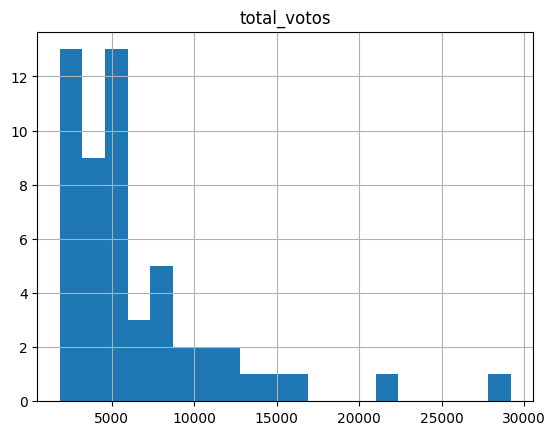

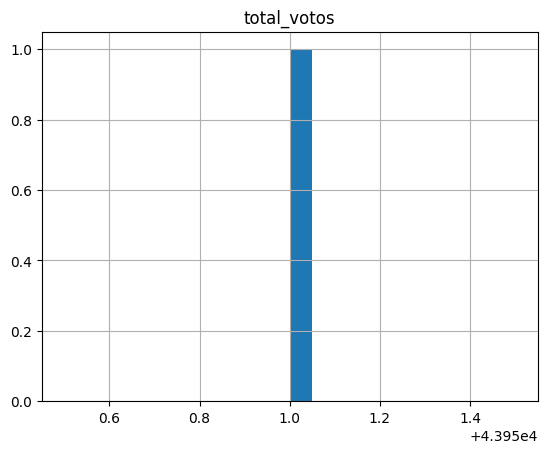

In [ ]:
votadftotmerged = mergdf[ ["sq_candidato",'nome_candidato_x','nome_municipio',"num_turno_x","total_votos",\
                    'desc_sit_cand_tot','descricao_cargo_x','descricao_sexo'] ]\
                    .groupby(["sq_candidato",'nome_municipio',"num_turno_x",\
                              'nome_candidato_x','desc_sit_cand_tot','descricao_cargo_x','descricao_sexo']).sum()\
                              .reset_index().sort_values(by=['total_votos'], ascending=False)


votadftotmerged[ (votadftotmerged.desc_sit_cand_tot=="ELEITO") & (votadftotmerged.descricao_cargo_x=="PREFEITO") & \
                (votadftotmerged.descricao_sexo=="FEMININO") & \
          (votadftotmerged.total_votos<40000) ].hist(column="total_votos", bins=20)

votadftotmerged[ (votadftotmerged.desc_sit_cand_tot=="ELEITO") & (votadftotmerged.descricao_cargo_x=="PREFEITO") & \
                 (votadftotmerged.descricao_sexo=="FEMININO") & \
          (votadftotmerged.total_votos>=40000) ].hist(column="total_votos", bins=20)

Faça uma tabela de contingência entre partidos e raça dos candidatos a prefeito.



Faça um gráfico de dispersão entre o total de votos recebido pelo candidato a prefeito e a idade do candidato a prefeito.


Avalie a ausência de dados nos atributos da tabela de candidatos.


Faça a transformação dos atributos de cor/raça e de sexo para binário por hot_encoding.


Escolha uma cidade, faça a normalização minmax e também a padronização do total de votos recebidos pelos candidatos a vereador, veja mínimo e máximo antes e depois. Visualize o histograma.


Crie um atributo na tabela de votação para registrar o porte da município, se houveram 100mil votos registrados para prefeito, o município é grande, entre 10mil e 100mil, o município é médio, e menos de 10mil, o município é pequeno.
